# Classification Model

> In this post, We will cover the use case of Classification model including Logistic Regression through StatsModels and scikit-learn.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Machine_Learning]
- image: images/log_reg_comp.png

## Resources & Credits
The dataset that we use are from the book `Introduction to Statistical Learning` by Gareth James, Daniela Witten, Trevor Hastie, and Rob Tibshirani. You can check the details in [here](https://www.statlearning.com/).

## Packages

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

## Credit - Load the dataset and EDA

The goal of `Default.csv` Dataset it to classify whether the person is default or not based on the several features. In this post, we will only use `balance` feature for classification.

In [5]:
default = pd.read_csv('./dataset/Default.csv')
default = default[['default', 'balance']]

In [6]:
default.shape

(10000, 2)

In [7]:
default.head()

default      balance
0      No   729.526495
1      No   817.180407
2      No  1073.549164
3      No   529.250605
4      No   785.655883

## Simple model - linear regression
At first, we build simple linear regression model for the baseline.

In [8]:
X = default['balance']
X = sm.add_constant(X)
X.iloc[:6, :]

const      balance
0    1.0   729.526495
1    1.0   817.180407
2    1.0  1073.549164
3    1.0   529.250605
4    1.0   785.655883
5    1.0   919.588530

Then we convert label (or response variable) from text data to numerical.

In [9]:
y = list(map(lambda x: 1 if x == 'Yes' else 0, default['default']))
y[:6]

[0, 0, 0, 0, 0, 0]

In [14]:
linear_reg = sm.OLS(y, X).fit()
linear_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     1397.
Date:                Thu, 27 May 2021   Prob (F-statistic):          2.77e-286
Time:                        17:59:23   Log-Likelihood:                 3644.8
No. Observations:               10000   AIC:                            -7286.
Df Residuals:                    9998   BIC:                            -7271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0752      0.003    -22.416      0.000      -0.082      -0.069
balance        0.0001   3.47e-06     37.374      0.000       0.000       0.000
==============================================================================
Omnibus:                     8547.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180810.806
Skew:                           4.243   Prob(JB):                         0.00
Kurtosis:                      22.025   Cond. No.                     1.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After that, we can measure the performance with graph.

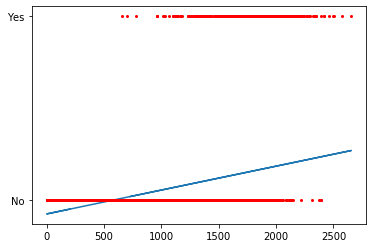

In [15]:
y_pred = linear_reg.predict(X)
plt.plot(default['balance'], y_pred)
plt.plot(default['balance'], default['default'], linestyle='none', marker='o', markersize=2, color='red')
plt.show()

In the graph, the real values are shown in red, and blue line is the regression line. And this line cannot classify some sort of negative data. That's the problem.

## Logistic Regression
In order to handle the mis-classification in linear regression, we can use the logistic regression as an alternative.
The usage is simple. Just use `sm.Logit()` function for logistic regression.

In [16]:
logistic_reg = sm.Logit(y, X).fit()
logistic_reg.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 May 2021   Pseudo R-squ.:                  0.4534
Time:                        18:02:36   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

After that, we can measure the performance with graph. In this case, we need to sort the predicted output for visualization.

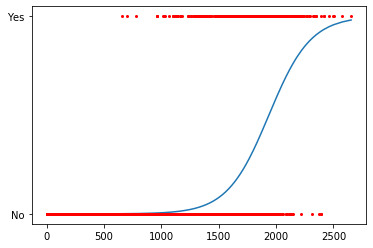

In [22]:
y_pred = logistic_reg.predict(X)
plt.plot(np.sort(default['balance']), np.sort(y_pred))
plt.plot(default['balance'], default['default'], linestyle='none', marker='o', markersize=2, color='red')
plt.show()

For the comparison, we plot the two graphs at once.

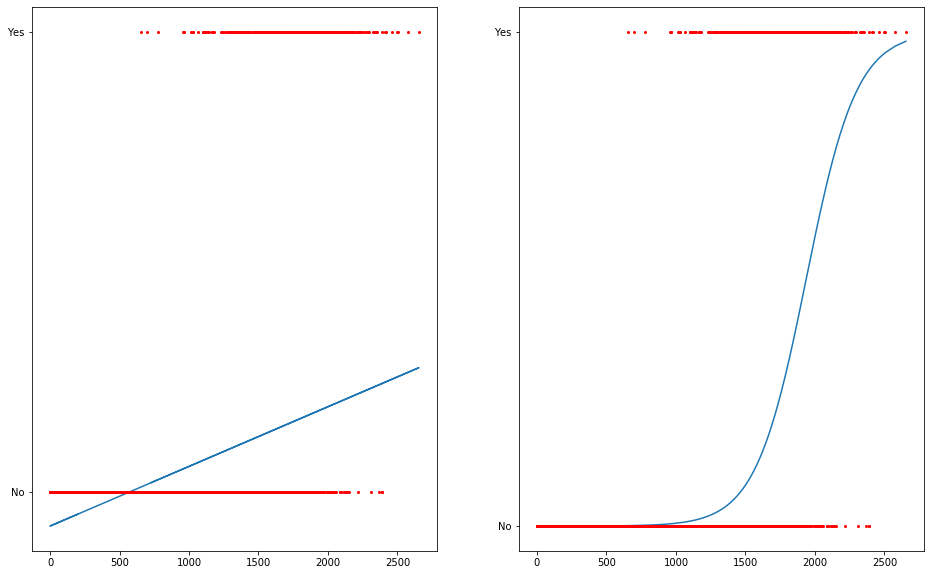

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
y_pred_linear = linear_reg.predict(X)
y_pred_logistic = logistic_reg.predict(X)

ax[0].plot(default['balance'], y_pred_linear)
ax[0].plot(default['balance'], default['default'], linestyle='none', marker='o', markersize=2, color='red')
ax[1].plot(np.sort(default['balance']), np.sort(y_pred_logistic))
ax[1].plot(default['balance'], default['default'], linestyle='none', marker='o', markersize=2, color='red')
plt.show()